In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

Using TensorFlow backend.


In [2]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 452s 1us/step


In [3]:
X,y = shap.datasets.imagenet50()

In [4]:
# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

In [5]:
# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

In [6]:
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)

In [14]:
to_explain = X[[40,44]]

In [15]:
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=3)

In [16]:
print(indexes)

[[440 720 901]
 [430 890 805]]


In [17]:
print(shap_values)

[array([[[[ 4.64393714e-06,  1.09341546e-07,  9.99201051e-06, ...,
           2.67284843e-06,  1.65783643e-06,  3.59265333e-07],
         [ 7.56602173e-06,  2.78711383e-06, -9.54138148e-07, ...,
           6.33961430e-06, -6.64051780e-06,  1.78300595e-07],
         [ 3.22284032e-06, -3.46525149e-06, -2.39439798e-06, ...,
           8.59589366e-06, -1.40119016e-05,  2.58379160e-06],
         ...,
         [ 2.24588739e-06, -1.38376462e-05, -2.01935558e-06, ...,
           1.34168269e-06, -2.92720674e-06, -1.12698889e-06],
         [ 2.56284343e-06,  3.39051417e-07,  1.27423705e-06, ...,
          -6.41853233e-06,  1.03764288e-06, -2.39251893e-06],
         [ 6.67825016e-06,  8.22805520e-06,  3.70691441e-07, ...,
          -1.73129808e-06, -1.64247110e-06,  1.47527830e-06]],

        [[-1.78269197e-06,  1.00678360e-05, -5.65295554e-06, ...,
          -4.68956600e-06, -8.22702817e-07,  1.35949187e-06],
         [ 2.42274468e-06,  7.71301108e-06, -5.40167551e-06, ...,
           5.47592080

In [18]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

In [19]:
print(index_names)

[['beer_bottle' 'pill_bottle' 'whiskey_jug']
 ['basketball' 'volleyball' 'soccer_ball']]


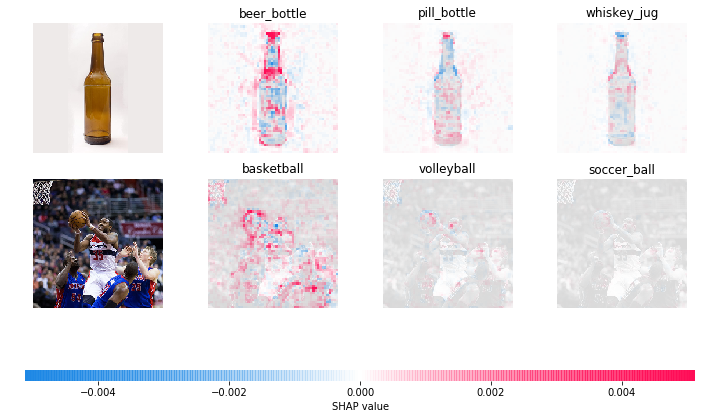

In [20]:
# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)